<h1>2. Manejo de overscan, recorte y sustracción de sesgo

El sesgo en una cámara CCD es una compensación de CC aplicada a todos los píxeles, de modo que cuando el voltaje en cada píxel se convierte en un número, el número siempre será positivo. En un CCD ideal, el sesgo sería el mismo para cada píxel y no cambiaría con el tiempo. En la práctica, el sesgo es ligeramente diferente para cada píxel y puede variar en un conteo o dos de una noche a otra o durante una noche.

Una imagen sesgada es una fotografía tomada con el obturador cerrado y sin tiempo de exposición; Piense en ello como un comando para que la cámara haga lo que normalmente hace para preparar los componentes electrónicos de la cámara para tomar una imagen y luego lea inmediatamente el CCD como si hubiera tomado una foto.

El overscan es una parte del chip CCD que no está expuesta a la luz. En algunas cámaras se trata literalmente de varias filas y/o columnas adicionales que no están expuestas a la luz, mientras que en otras la sobreexploración se produce electrónicamente. Puede ser útil si el nivel de polarización cambia en el transcurso de una noche.

<h1>2.1. Sobre sesgo y overscan
    


<h1>2.1.1. Muestra de imágenes sesgadas 

Las imágenes a continuación son un marco de sesgo único y un promedio de 100 marcos de sesgo de un Andor Apogee Aspen CG16M , un CCD 4k × 4k de gama baja con un chip sensor Kodak KAF-16803 . Ese modelo de cámara tiene un nivel de polarización típico de alrededor de 1000 y ruido de lectura de alrededor de 10, aunque el valor exacto varía de una cámara a otra y con la temperatura.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Use custom style for larger fonts and figures
plt.style.use('guide.mplstyle')

In [5]:
from astropy.nddata import CCDData
from astropy.visualization import hist

import numpy as np

from convenience_functions import show_image

In [6]:
one_bias = CCDData.read('single_bias_thermoelectric.fit.bz2', unit='adu')
one_hundred_bias = CCDData.read('combined_bias_100_images.fit.bz2', unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


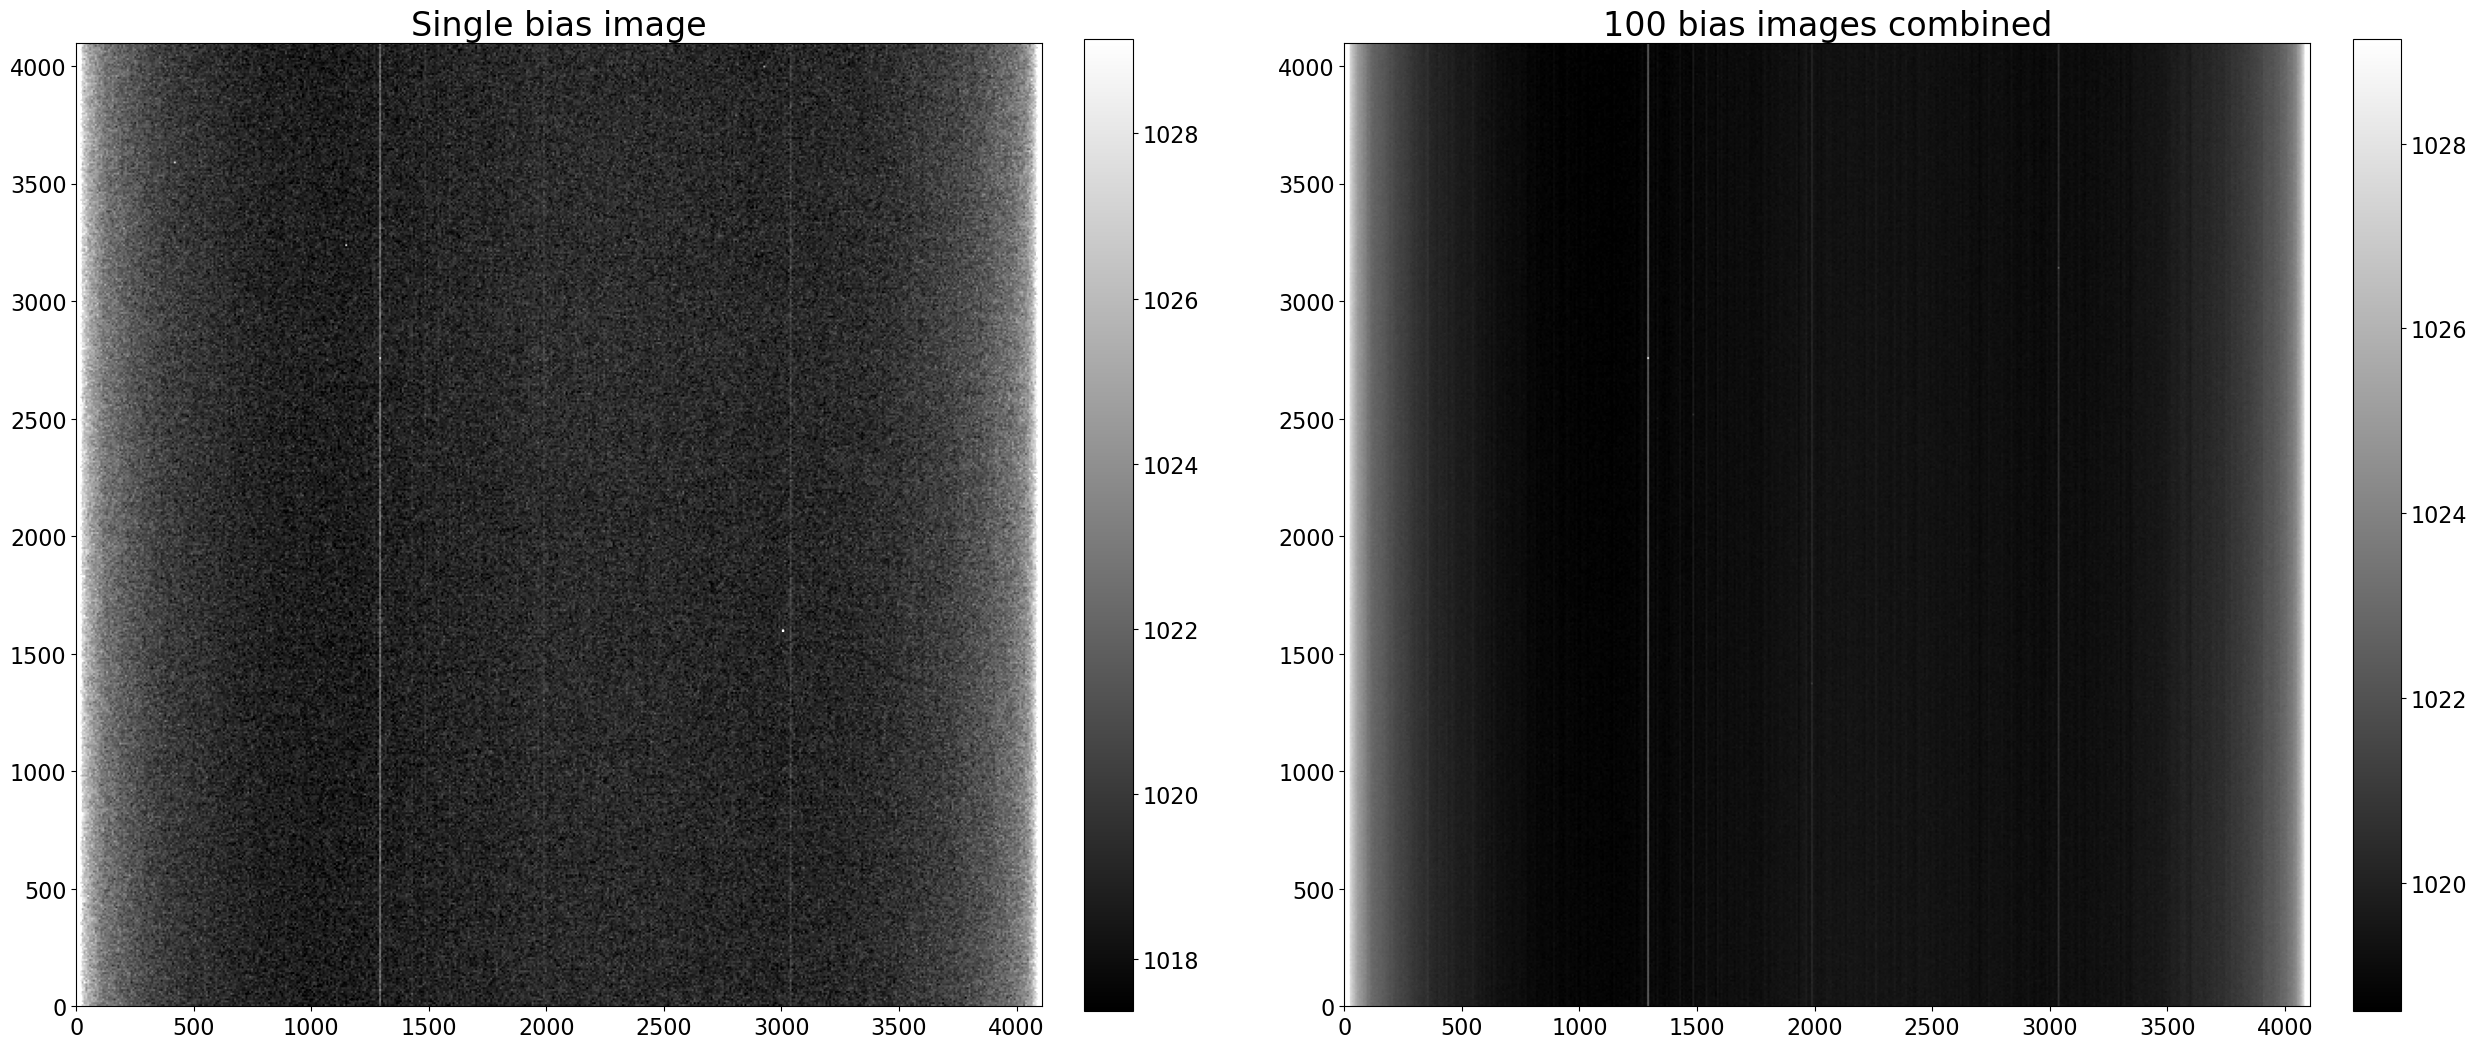

In [7]:
fig, (ax_1_bias, ax_avg_bias) = plt.subplots(1, 2, figsize=(30, 15))

show_image(one_bias.data, cmap='gray', ax=ax_1_bias, fig=fig, input_ratio=8)
ax_1_bias.set_title('Single bias image')
show_image(one_hundred_bias.data, cmap='gray', ax=ax_avg_bias, fig=fig, input_ratio=8)
ax_avg_bias.set_title('100 bias images combined');

<h1>2.1.1.1. Tenga en cuenta algunas cosas

El nivel de sesgo en esta cámara específica es de aproximadamente 1023 (el rango medio de la barra de colores).

La imagen es más brillante en los bordes izquierdo y derecho. Este “brillo del amplificador” está frecuentemente presente y es causado por la electrónica CCD (los fotosensores con un voltaje aplicado son LED).

Hay varias líneas verticales; estas son columnas para las cuales el nivel de sesgo es consistentemente más alto.

Hay una "estática" notable en las imágenes; eso es ruido de lectura.

Ninguna de las variaciones es particularmente grande.

La combinación de varias imágenes de sesgo reduce enormemente el ruido de lectura. Este ejemplo es un poco poco realista porque se combinaron 100 imágenes sesgadas, pero aún ilustra la idea de que la combinación de imágenes reduce el ruido.

<h1>2.1.2. Impacto de la combinación de imágenes en el ruido 

Como se discutió extensamente en el cuaderno sobre combinación , la razón para tomar y combinar varias imágenes de calibración es reducir el ruido si las imágenes se usan para la calibración. La diferencia entre una sola imagen y una combinación de imágenes es evidente en las imágenes de arriba. Otra forma de ver el impacto de combinar imágenes es en el histograma de valores de píxeles. Observe que la distribución de valores es mucho más estrecha para la imagen combinada que para un solo sesgo. Los píxeles cerca de los bordes, donde el brillo del amplificador es grande, se agrupan por separado del resto de los píxeles para enfatizar la uniformidad del chip lejos del brillo.

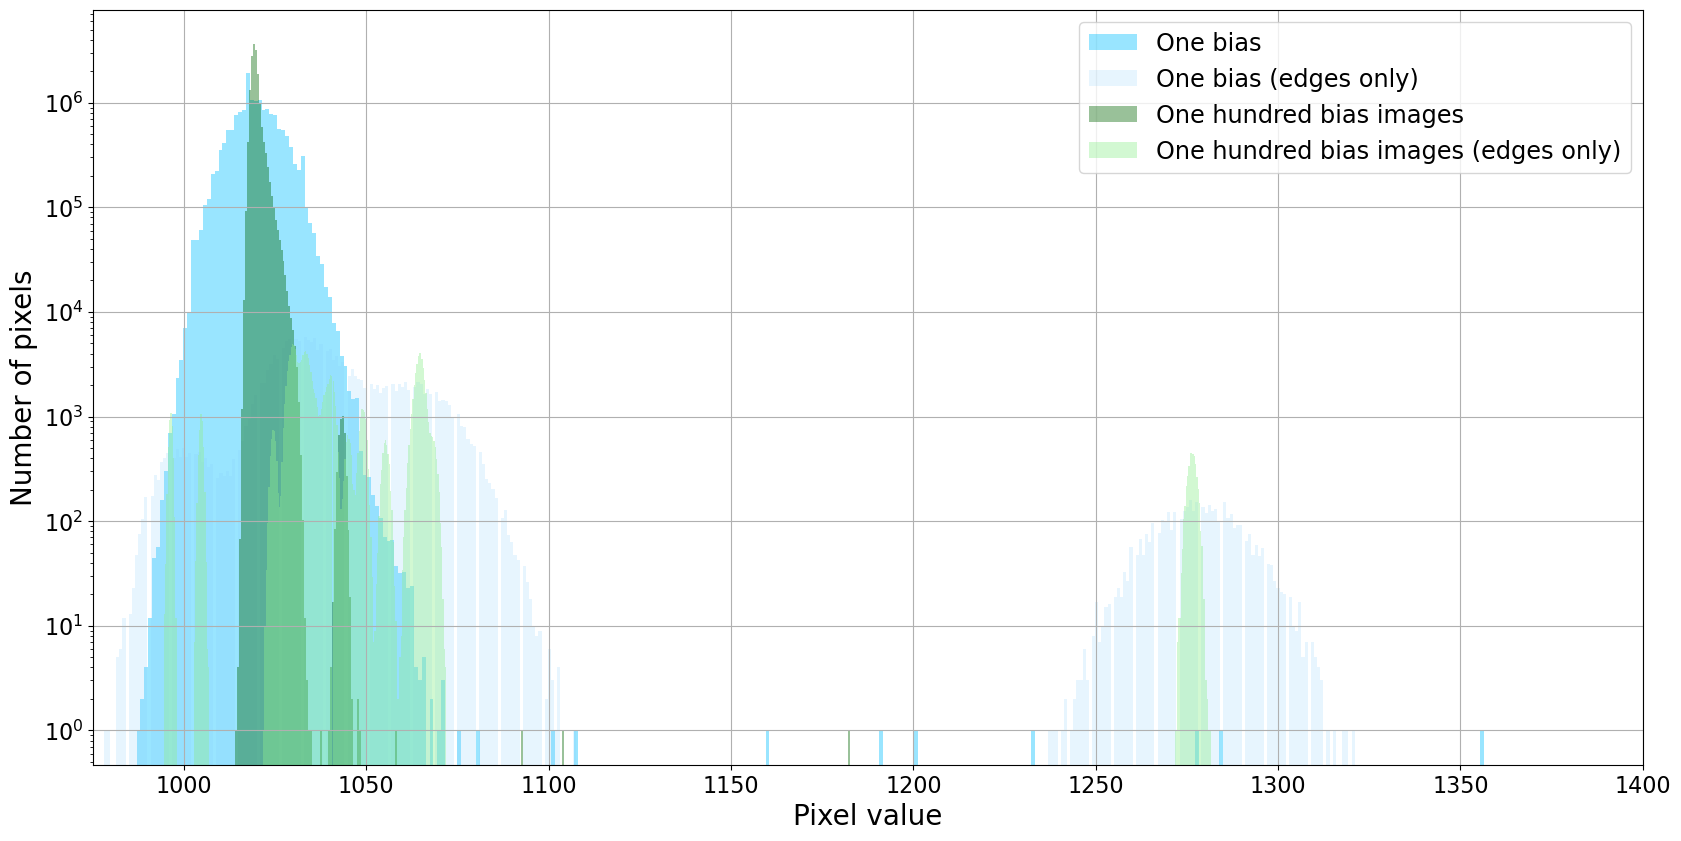

In [9]:
plt.figure(figsize=(20, 10))
hist(one_bias.data[:, 15:-30].flatten(), bins=800, alpha=0.4, label='One bias', color='deepskyblue')
hist(np.concatenate((one_bias.data[:, :15].flatten(), one_bias.data[:, -30:].flatten())), bins=400, alpha=0.2, label='One bias (edges only)', color='lightskyblue')
#hist(, bins=800, alpha=0.2, label='One bias (edges only)', color='darkblue')
hist(one_hundred_bias.data[:, 15:-30].flatten(), bins=800, alpha=0.4, label='One hundred bias images', color='darkgreen')
hist(np.concatenate((one_hundred_bias.data[:, :15].flatten(), one_hundred_bias.data[:, -30:].flatten())), bins=800, alpha=0.4, label='One hundred bias images (edges only)', color='lightgreen')

#hist(one_hundred_bias.data[:, :15].flatten(), bins=800, alpha=0.4, label='One hundred bias images', color='darkgreen')

plt.grid()
plt.xlim(975, 1400)
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.semilogy();

<h1>2.1.3. Descripción general de la calibración de sesgo 

La progresión aquí es "calibrar" las imágenes de sesgo restando el sobrebarrido, si se desea, recortar el sobrebarrido de las imágenes de sesgo si está presente y combinar todas las imágenes de sesgo para hacer un sesgo "combinado" (otro término común para estos imágenes es un sesgo "maestro" y ocasionalmente un sesgo "súper").